In [3]:
import pandas as pd

rawdata = pd.read_csv('data/time_series_covid_19_confirmed_US.csv', header = 0)
bystate = rawdata.drop(columns = ['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Lat', 'Long_', 'Combined_Key', 'Country_Region'])

byStates = bystate.groupby('Province_State').sum()
byStates = byStates.transpose()
#print(byStates.columns)
byStates.drop(columns = ['Diamond Princess', 'Grand Princess'], inplace = True) # drop data from Diamond Princess
byStates.index = pd.to_datetime(byStates.index) # convert the index to date type
byStates.columns.name = 'Date' # rename the index to date
# byStates.to_excel('confirmedUS.xlsx') # save data

# trend of confirmed COVID-19 cases in Connecticut, New York, Alabama

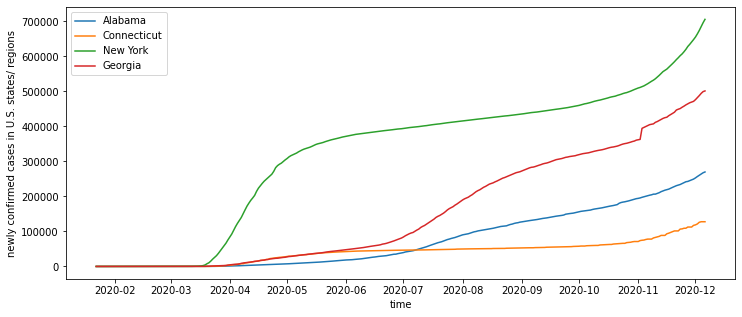

In [108]:
plt.figure(figsize = (12,5))
plt.plot(byStates.index, byStates['Alabama'], label = 'Alabama')
plt.plot(byStates.index, byStates['Connecticut'], label = 'Connecticut')
plt.plot(byStates.index, byStates['New York'], label = 'New York')
plt.plot(byStates.index, byStates['Georgia'], label = 'Georgia')
plt.xlabel('time'), plt.ylabel('newly confirmed cases in U.S. states/ regions'), plt.legend()
plt.show()

# trend of confirmed COVID-19 cases/ COVID death in CT, NY, AL per capita

In [4]:
rawdata_death = pd.read_csv('data/time_series_covid_19_deaths_US.csv', header = 0)

tmp = rawdata_death.groupby('Province_State').sum(['Population']) # save state population data

statePop = tmp['Population']
statePop[tmp.index == 'Connecticut'].iloc[0]


3565287

In [5]:
bystate_death = rawdata_death.drop(columns = ['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Lat', 'Long_', 'Combined_Key', 'Country_Region'])
bystate_death.drop(columns = 'Population', inplace = True)

statedeath = bystate_death.groupby('Province_State').sum()
statedeath = statedeath.transpose()
statedeath.columns.name = 'Date' # rename the index to date
statedeath.drop(columns = ['Diamond Princess', 'Grand Princess'], inplace = True) # drop data from Diamond Princess
statedeath.index = pd.to_datetime(statedeath.index) # convert the index to date type
#statedeath.to_excel('DeathUS.xlsx') # save data


In [82]:
#mconfirmed = byStates.groupby([pd.Grouper(freq='M')]).sum()
#mdeath = statedeath.groupby([pd.Grouper(freq='M')]).sum()
#mconfirmed.to_excel('cleanedData.xlsx', sheet_name = 'confirmed')
#mdeath.to_excel('cleanedData.xlsx', sheet_name = 'death')


cleaned = pd.DataFrame(byStates['Alabama'])
cleaned.columns = ['confirmed'] * len(cleaned.columns)
cleaned['death'] = statedeath['Alabama']
cleaned['state'] = 'Alabama'
cleaned['Date'] = cleaned.index
cleaned.reset_index(drop=True, inplace=True)



for i in range(len(byStates.columns)-1):
    tmpstatename = byStates.columns[i+1]
    
    tmp = pd.DataFrame(byStates[tmpstatename])
    tmp.columns = ['confirmed'] * len(tmp.columns)
    tmp['death'] = statedeath[tmpstatename]
    tmp['state'] = tmpstatename
    tmp['Date'] = tmp.index
    tmp.reset_index(drop=True, inplace=True)
    tmp2 = cleaned
    del cleaned
    
    tmp3 = pd.concat([tmp2, tmp])
    cleaned = tmp3
    del tmp2, tmp


cleaned.to_excel('CleanedData.xlsx')


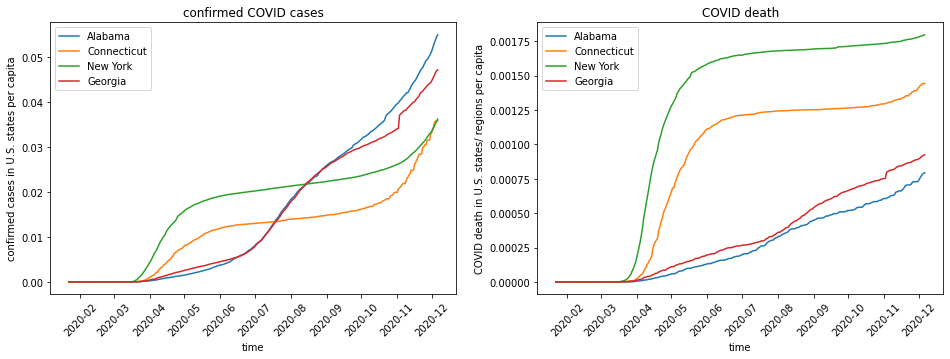

In [200]:
plt.figure(figsize = (16,5))

plt.subplot(121)

plt.plot(byStates.index, byStates['Alabama']/statePop[tmp.index == 'Alabama'].iloc[0], label = 'Alabama')
plt.plot(byStates.index, byStates['Connecticut']/statePop[tmp.index == 'Connecticut'].iloc[0], label = 'Connecticut')
plt.plot(byStates.index, byStates['New York']/statePop[tmp.index == 'New York'].iloc[0], label = 'New York')
plt.plot(byStates.index, byStates['Georgia']/statePop[tmp.index == 'Georgia'].iloc[0], label = 'Georgia')
plt.xlabel('time'), plt.ylabel('confirmed cases in U.S. states per capita'), plt.legend(), plt.xticks(rotation = 45)
plt.title('confirmed COVID cases')

plt.subplot(122)
plt.plot(statedeath.index, statedeath['Alabama']/statePop[tmp.index == 'Alabama'].iloc[0], label = 'Alabama')
plt.plot(statedeath.index, statedeath['Connecticut']/statePop[tmp.index == 'Connecticut'].iloc[0], label = 'Connecticut')
plt.plot(statedeath.index, statedeath['New York']/statePop[tmp.index == 'New York'].iloc[0], label = 'New York')
plt.plot(statedeath.index, statedeath['Georgia']/statePop[tmp.index == 'Georgia'].iloc[0], label = 'Georgia')
plt.xlabel('time'), plt.ylabel('COVID death in U.S. states/ regions per capita'), plt.legend(), plt.xticks(rotation = 45)
plt.title('COVID death')

plt.show()




# trend of confirmed COVID-19 cases/ COVID death in CT, NY, AL

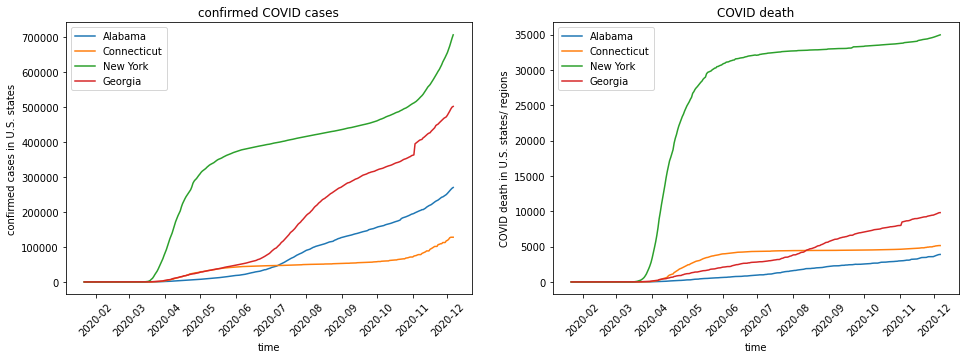

In [202]:
plt.figure(figsize = (16,5))

plt.subplot(121)

plt.plot(byStates.index, byStates['Alabama'], label = 'Alabama')
plt.plot(byStates.index, byStates['Connecticut'], label = 'Connecticut')
plt.plot(byStates.index, byStates['New York'], label = 'New York')
plt.plot(byStates.index, byStates['Georgia'], label = 'Georgia')
plt.xlabel('time'), plt.ylabel('confirmed cases in U.S. states'), plt.legend(), plt.xticks(rotation = 45)
plt.title('confirmed COVID cases')

plt.subplot(122)
plt.plot(statedeath.index, statedeath['Alabama'], label = 'Alabama')
plt.plot(statedeath.index, statedeath['Connecticut'], label = 'Connecticut')
plt.plot(statedeath.index, statedeath['New York'], label = 'New York')
plt.plot(statedeath.index, statedeath['Georgia'], label = 'Georgia')
plt.xlabel('time'), plt.ylabel('COVID death in U.S. states/ regions'), plt.legend(), plt.xticks(rotation = 45)
plt.title('COVID death')

plt.show()


# trend of COVID infection and death in the U.S.

<Figure size 1296x288 with 0 Axes>

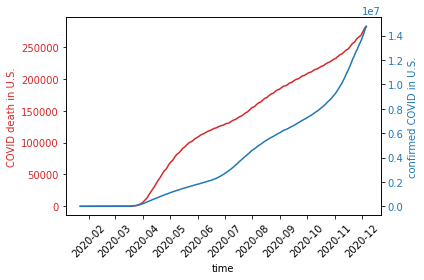

In [196]:
plt.figure(figsize = (18,4))
fig, ax1 = plt.subplots()

ax1.set_xlabel('time (s)')
ax1.set_ylabel('COVID death in U.S.', color='tab:red')
ax1.plot(statedeath.index, statedeath.sum(axis = 1), label = 'death', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')
plt.xlabel('time'), plt.ylabel('COVID death in U.S.'), plt.xticks(rotation = 45)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('confirmed COVID in U.S.', color='tab:blue')  # we already handled the x-label with ax1
ax2.plot(byStates.index, byStates.sum(axis = 1), color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout()  # otherwise the right y-label is slightly clipped


plt.show()



# check seasonality of COVID infection

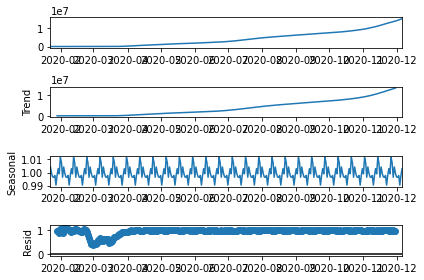

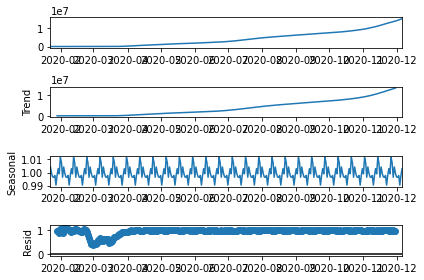

In [204]:
import numpy as np 
from datetime import datetime, date 
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math


res = seasonal_decompose( np.sum(byStates, axis = 1) , model='multiplicative', period=12)
#res.seasonal
res.plot()

# no obvious seasonality is observed